<a href="https://colab.research.google.com/github/shriya2909/BreastCancerDetector/blob/master/Breast_Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem Statement**
I have been tasked with developing a means to help doctors diagnose breast cancer. Data given is about biopsied breast cells; where it is benign (not harmful) or malignant (cancerous).
1. What features of a cell are the largest drivers of malignancy?
2. How would a physician this product?
3. There is a non-zero cost in time and money to collect each feature about a given cell. How would I go about determining the most cost-effective method of
detecting malignancy?

## **Data Features** 
Sample code number: id number 
<br>Clump Thickness: 1 - 10 
<br>Uniformity of Cell Size: 1 - 10 
<br>Uniformity of Cell Shape: 1 - 10 
<br>Marginal Adhesion: 1 - 10 
<br>Single Epithelial Cell Size: 1 - 10 
<br>Bare Nuclei: 1 - 10 
<br>Bland Chromatin: 1 - 10 
<br>Normal Nucleoli: 1 - 10 
<br>Mitoses: 1 - 10 
<br>Class: (2 for benign, 4 for malignant)


## **Quick Answers**

1. *What features of a cell are the largest drivers of malignancy?*
*   Uniformity of Cell Size
*   Uniformity of Cell Shape
*   Normal Nucleoli
*   Clump Thickness
*   Marginal Adhesion

2. *How would a physician use this product?*
<br>Product can be used to predict malignancy with 0.95 Recall i.e. is the ability of a test to correctly identify malignant results to get the true positive rate.

3. *There is a non-zero cost in time and money to collect each feature about a given cell. How would I go about determining the most cost-effective method of detecting malignancy?*
<br>  The product utilises 3 features - Uniformity of Cell Shape, Clump Thickness Mitoses. 
  However, there is a trade off between number of features in the model and the recall of the Malignant class. In order to further increase the recall from 0.95, we can add additional features based on the order of their importance.
Recall is utilised here as the metric for evaluation as we aim to maximize finding all patients who have cancerous cells and minimize any relevent patient go undiagnosed.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pwd
%cd "/content/drive/My Drive/Data Challenges/Breast Cancer Detection"
!pwd

/content/drive/My Drive/Data Challenges/Breast Cancer Detection
/content/drive/My Drive/Data Challenges/Breast Cancer Detection
/content/drive/My Drive/Data Challenges/Breast Cancer Detection


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Read the txt file into a dataframe 

import pandas as pd
pd.set_option('display.max_columns', None)
data = pd.DataFrame(pd.read_csv('./breast-cancer-wisconsin.txt', index_col='Index'))



# **EDA and Data Cleaning**
**Overview**
1. Checking for nulls 
2. Checking for duplicates
3. Analysis class values and what they may signify
4. Removing some erroneous data 
5. Cleaning some erroneous data 
6. Removing unnecessary feature 
**Result**
<br>Data shape transformed from (15855, 11) to (694, 10). Overcoming class imbalance. Number of data points for class 2 =>  456 and class 4 => 254.








In [ ]:
print("Cancer data set dimensions : {}".format(data.shape))

Cancer data set dimensions : (15855, 11)


In [ ]:
# Checking for nulls
data.apply(lambda x: sum(x.isnull()),axis=0)

ID                              0
Clump Thickness                 0
Uniformity of Cell Size        28
Uniformity of Cell Shape       28
Marginal Adhesion              28
Single Epithelial Cell Size    28
Bare Nuclei                    28
Bland Chromatin                28
Normal Nucleoli                28
Mitoses                        28
Class                          28
dtype: int64

In [ ]:
#Removing duplicates if any 
dub_check = data.duplicated()

In [ ]:
# passing NOT of bool series to see unique values only 
data = data[~dub_check] 
  
# displaying data 
data.info() 
data 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 754 entries, 0 to 15779
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID                           754 non-null    int64 
 1   Clump Thickness              754 non-null    int64 
 2   Uniformity of Cell Size      741 non-null    object
 3   Uniformity of Cell Shape     741 non-null    object
 4   Marginal Adhesion            741 non-null    object
 5   Single Epithelial Cell Size  741 non-null    object
 6   Bare Nuclei                  741 non-null    object
 7   Bland Chromatin              741 non-null    object
 8   Normal Nucleoli              741 non-null    object
 9   Mitoses                      741 non-null    object
 10  Class                        741 non-null    object
dtypes: int64(2), object(9)
memory usage: 70.7+ KB


,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Index,,,,,,,,,,,
0,1241035,7,8,3,7,4,5,7,8,2,4
1,1107684,6,10,5,5,4,10,6,10,1,4
2,691628,8,6,4,10,10,1,3,5,1,4
3,1226612,7,5,6,3,3,8,7,4,1,4
4,1142706,5,10,10,10,6,10,6,5,2,4
...,...,...,...,...,...,...,...,...,...,...,...
15717,752904,10,1,1,1,2,10,5,4,1,4
15720,1296025,4,1,2,1,2,1,1,1,1,2
15742,160296,5,8,8,10,5,10,8,10,3,4


In [ ]:
# Column of interest 
print(data['Class'].value_counts())

2          451
4          237
40          17
?           12
No idea     10
#            9
20           5
Name: Class, dtype: int64


In [ ]:
data_hash = data[data['Class'].isin(['#'])]
data_ND = data[data['Class'].isin(['No idea'])]
data_q = data[data['Class'].isin(['?'])]
print(data_hash.head(3))
print(data_ND.head(3))

            ID  Clump Thickness Uniformity of Cell Size  \
Index                                                     
396    1111249               10                       #   
1179   1198641               10                       #   
2226   1106829                7                       #   
2951   1110524               10                       #   
3586   1115293                1                       #   

      Uniformity of Cell Shape Marginal Adhesion Single Epithelial Cell Size  \
Index                                                                          
396                          #                 #                           #   
1179                         #                 #                           #   
2226                         #                 #                           #   
2951                         #                 #                           #   
3586                         #                 #                           #   

      Bare Nuclei Bland C

In [ ]:
print(data_q.head(5))

            ID  Clump Thickness Uniformity of Cell Size  \
Index                                                     
1143   1198641               10                       ?   
2856    691628                8                       ?   
3424   1169049                7                       ?   
3941   1112209                8                       ?   
5829   1226612                7                       ?   

      Uniformity of Cell Shape Marginal Adhesion Single Epithelial Cell Size  \
Index                                                                          
1143                         ?                 ?                           ?   
2856                         ?                 ?                           ?   
3424                         ?                 ?                           ?   
3941                         ?                 ?                           ?   
5829                         ?                 ?                           ?   

      Bare Nuclei Bland C

In [ ]:
# Dropping No idea, ? and  # class rows makes sense as they provide no information about any of the features

new_data = data[data['Class'].isin(['#','No idea','?']) == False]

In [ ]:
print(new_data['Class'].value_counts())

2     451
4     237
40     17
20      5
Name: Class, dtype: int64


In [ ]:
# Going deeper for classes 40 and 20 
data_20 = new_data[new_data['Class'].isin(['20'])]
data_2 = new_data[new_data['Class'].isin(['2'])]


In [ ]:
data_40 = new_data[new_data['Class'].isin(['40'])]
data_4 = new_data[new_data['Class'].isin(['4'])]

In [ ]:
# It seems like erroneous multiplication of values by 10 for classes 20 and 40 
# Data Cleaning - dividing all values by 10 for 20 and 40 classes 
data_40.dtypes

ID                              int64
Clump Thickness                 int64
Uniformity of Cell Size        object
Uniformity of Cell Shape       object
Marginal Adhesion              object
Single Epithelial Cell Size    object
Bare Nuclei                    object
Bland Chromatin                object
Normal Nucleoli                object
Mitoses                        object
Class                          object
dtype: object

In [ ]:
#Converting columns to numerical times in order to divide by 10 
data_40[['Uniformity of Cell Size','Uniformity of Cell Shape', 'Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']] = data_40[['Uniformity of Cell Size','Uniformity of Cell Shape', 'Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']].apply(pd.to_numeric) 

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
data_40.dtypes

ID                             int64
Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

In [ ]:
data_40 = data_40.div(10) 

In [ ]:
print(data_40.head(5))

              ID  Clump Thickness  Uniformity of Cell Size  \
Index                                                        
167    1226612.0              7.0                      5.0   
213    1112209.0              8.0                     10.0   
243    1169049.0              7.0                      3.0   
374    1198641.0             10.0                     10.0   
1191   1241035.0              7.0                      8.0   
1222    601265.0             10.0                      4.0   
1888   1200892.0              8.0                      6.0   
2053   1111249.0             10.0                      6.0   
2183   1142706.0              5.0                     10.0   
2306   1076352.0              3.0                      6.0   

       Uniformity of Cell Shape  Marginal Adhesion  \
Index                                                
167                         6.0                3.0   
213                        10.0                1.0   
243                         4.0        

In [ ]:
data_20.dtypes

ID                              int64
Clump Thickness                 int64
Uniformity of Cell Size        object
Uniformity of Cell Shape       object
Marginal Adhesion              object
Single Epithelial Cell Size    object
Bare Nuclei                    object
Bland Chromatin                object
Normal Nucleoli                object
Mitoses                        object
Class                          object
dtype: object

In [ ]:
data_20[['Uniformity of Cell Size','Uniformity of Cell Shape', 'Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']] = data_20[['Uniformity of Cell Size','Uniformity of Cell Shape', 'Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']].apply(pd.to_numeric) 

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
data_20.dtypes

ID                             int64
Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

In [ ]:
print(data_20.head(5))
data_20 = data_20.div(10) 

             ID  Clump Thickness  Uniformity of Cell Size  \
Index                                                       
2328   12124220               40                       10   
2944   12048980               60                       10   
12299  12760910               10                       30   
12350  12758070               40                       20   
14757  12270810               30                       10   

       Uniformity of Cell Shape  Marginal Adhesion  \
Index                                                
2328                         10                 10   
2944                         10                 10   
12299                        10                 10   
12350                        40                 30   
14757                        10                 30   

       Single Epithelial Cell Size  Bare Nuclei  Bland Chromatin  \
Index                                                              
2328                            20           10          

In [ ]:
print(data_20.head(5))

              ID  Clump Thickness  Uniformity of Cell Size  \
Index                                                        
2328   1212422.0              4.0                      1.0   
2944   1204898.0              6.0                      1.0   
12299  1276091.0              1.0                      3.0   
12350  1275807.0              4.0                      2.0   
14757  1227081.0              3.0                      1.0   

       Uniformity of Cell Shape  Marginal Adhesion  \
Index                                                
2328                        1.0                1.0   
2944                        1.0                1.0   
12299                       1.0                1.0   
12350                       4.0                3.0   
14757                       1.0                3.0   

       Single Epithelial Cell Size  Bare Nuclei  Bland Chromatin  \
Index                                                              
2328                           2.0          1.0   

In [ ]:
data_40_20_cleaned = pd.concat([data_40,data_20])

In [ ]:
print(data_40_20_cleaned.head(5))

              ID  Clump Thickness  Uniformity of Cell Size  \
Index                                                        
167    1226612.0              7.0                      5.0   
213    1112209.0              8.0                     10.0   
243    1169049.0              7.0                      3.0   
374    1198641.0             10.0                     10.0   
1191   1241035.0              7.0                      8.0   
1222    601265.0             10.0                      4.0   
1888   1200892.0              8.0                      6.0   
2053   1111249.0             10.0                      6.0   
2183   1142706.0              5.0                     10.0   
2306   1076352.0              3.0                      6.0   

       Uniformity of Cell Shape  Marginal Adhesion  \
Index                                                
167                         6.0                3.0   
213                        10.0                1.0   
243                         4.0        

In [ ]:
data_4_2 = pd.concat([data_4,data_2])

In [ ]:
# Converting back to object type
data_40_20_cleaned = data_40_20_cleaned.round(decimals=0).astype(object)

In [ ]:
print(data_40_20_cleaned.head(5))

                ID Clump Thickness Uniformity of Cell Size  \
Index                                                        
167    1.22661e+06               7                       5   
213    1.11221e+06               8                      10   
243    1.16905e+06               7                       3   
374    1.19864e+06              10                      10   
1191   1.24104e+06               7                       8   
1222        601265              10                       4   
1888   1.20089e+06               8                       6   
2053   1.11125e+06              10                       6   
2183   1.14271e+06               5                      10   
2306   1.07635e+06               3                       6   

      Uniformity of Cell Shape Marginal Adhesion Single Epithelial Cell Size  \
Index                                                                          
167                          6                 3                           3   
213            

In [ ]:
print(data_40_20_cleaned['ID'].value_counts())

1275807.0    1
1110524.0    1
1107684.0    1
1076352.0    1
378275.0     1
1111249.0    1
1212422.0    1
1204898.0    1
1227081.0    1
1276091.0    1
1241035.0    1
1112209.0    1
1106829.0    1
601265.0     1
1142706.0    1
1226612.0    1
691628.0     1
832567.0     1
672113.0     1
1169049.0    1
1200892.0    1
1198641.0    1
Name: ID, dtype: int64


In [ ]:
dub_id = data_4_2['ID'].duplicated( keep = False)
print(dub_id)
data_4_2_id_dub = data_4_2[dub_id] 
print(data_4_2_id_dub)

Index
0        False
1        False
2        False
3        False
4        False
         ...  
15627    False
15638    False
15710     True
15720    False
15756    False
Name: ID, Length: 688, dtype: bool
            ID  Clump Thickness Uniformity of Cell Size  \
Index                                                     
25     1198641               10                      10   
1382    897471                4                       8   
2645   1299596                6                       6   
4119    695091                5                      10   
5692    822829                7                       6   
...        ...              ...                     ...   
14816  1070935                3                       1   
14863  1212422                4                       1   
15156  1240603                2                       1   
15428  1320077                1                       1   
15710   798429                1                       1   

      Uniformity of Cell S

In [ ]:
print(data_4_2_id_dub['ID'].value_counts())

1182404    6
1276091    5
1174057    2
411453     2
695091     2
1198641    2
1017023    2
822829     2
1143978    2
560680     2
1171710    2
1116192    2
734111     2
493452     2
1240603    2
1320077    2
1299596    2
1212422    2
897471     2
1293439    2
733639     2
1114570    2
1238777    2
1033078    2
1105524    2
1158247    2
1061990    2
1173347    2
1168736    2
798429     2
1354840    2
1070935    2
1299924    2
654546     2
385103     2
1277792    2
769612     2
1339781    2
Name: ID, dtype: int64


In [ ]:
#Random dub id check
data_4_2_id_dub_1276091 = data_4_2_id_dub[data_4_2_id_dub['ID'].isin(['1276091'])]
print(data_4_2_id_dub_1276091)
#Row values are distinct for same IDs

            ID  Clump Thickness Uniformity of Cell Size  \
Index                                                     
3368   1276091                2                       1   
7145   1276091                5                       1   
8741   1276091                1                       3   
14041  1276091                6                       1   
14354  1276091                3                       1   

      Uniformity of Cell Shape Marginal Adhesion Single Epithelial Cell Size  \
Index                                                                          
3368                         1                 1                           2   
7145                         1                 3                           4   
8741                         1                 1                           2   
14041                        1                 3                           2   
14354                        1                 3                           1   

      Bare Nuclei Bland C

In [ ]:
#ID is not unique but can still be dropped as it does not contain any cell feature information

data_40_20_cleaned = data_40_20_cleaned.drop(['ID'], axis=1)
data_4_2 = data_4_2.drop(['ID'], axis=1)


In [ ]:
data_final = pd.concat([data_4_2,data_40_20_cleaned])

In [ ]:
data_final.dtypes

Clump Thickness                object
Uniformity of Cell Size        object
Uniformity of Cell Shape       object
Marginal Adhesion              object
Single Epithelial Cell Size    object
Bare Nuclei                    object
Bland Chromatin                object
Normal Nucleoli                object
Mitoses                        object
Class                          object
dtype: object

In [ ]:
data_final.shape

(710, 10)

In [ ]:
data_final['Class'].value_counts()

2      451
4      237
4.0     17
2.0      5
Name: Class, dtype: int64

In [ ]:
data_final[['Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape', 'Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']] = data_final[['Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape', 'Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']].apply(pd.to_numeric, errors='coerce') 

In [ ]:
data_final['Class'].value_counts()

2.0    456
4.0    254
Name: Class, dtype: int64

In [ ]:
data_final.dtypes

Clump Thickness                  int64
Uniformity of Cell Size        float64
Uniformity of Cell Shape       float64
Marginal Adhesion              float64
Single Epithelial Cell Size    float64
Bare Nuclei                    float64
Bland Chromatin                float64
Normal Nucleoli                float64
Mitoses                        float64
Class                          float64
dtype: object

In [ ]:
# Checking for nulls
data_final.apply(lambda x: sum(x.isnull()),axis=0)

Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [ ]:
#Removing the remaining nulls
data_final = data_final[data_final['Bare Nuclei'].notnull()]


In [ ]:
data_final.shape

(694, 10)

In [ ]:
tmp = data_final['Class'].value_counts()

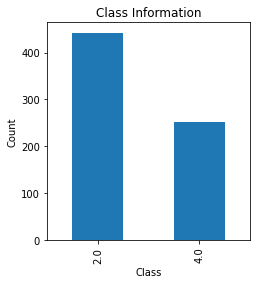

In [ ]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Class')
ax1.set_ylabel('Count')
ax1.set_title("Class Information")
tmp.plot(kind = 'bar')
plt.show()

# Feature Importance and Predictive Modelling 
**Model utilised - Random forest classifier** 
<br>This is an ensemble technique which fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. It provides interpretability and helps in determining feature importances. For this project, multiple random forest with varying features have been utilised to demonstrate predictive power of varied feature set. 


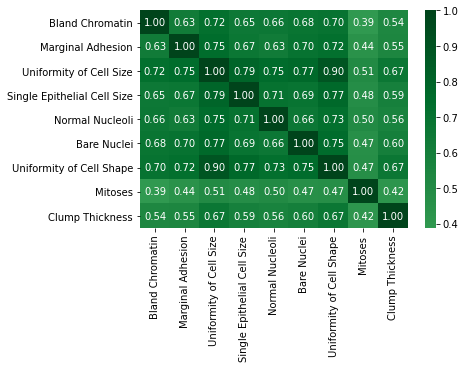

In [ ]:
# Plot the correlation values across variables as a heatmap
import seaborn as sns
cols = list(set(data_final.columns) - set(['Class']))
corr_mat = data_final[cols].corr(method='spearman')
sns.heatmap(corr_mat, vmax=1.0, center=0, fmt='.2f', annot=True, cmap=plt.cm.Greens)
plt.show()

In [ ]:

# Defining target variable and predictors
y = data_final['Class']
X = data_final.iloc[:,:-1]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

# Split into train and test sets -> 0.75 : 0.25 split
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.75, test_size=0.25)
    
# train model
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(train_X, train_y)

# make predictions for test data
pred_y= model.predict(test_X)



In [ ]:
# Find the importance of features using permutation importance
featimp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print (featimp)


Uniformity of Cell Size        0.312910
Uniformity of Cell Shape       0.204591
Bare Nuclei                    0.156610
Bland Chromatin                0.092310
Single Epithelial Cell Size    0.076512
Normal Nucleoli                0.061040
Clump Thickness                0.060274
Marginal Adhesion              0.027499
Mitoses                        0.008255
dtype: float64


In [ ]:
print('Confusion Matrix for test data is')
print(confusion_matrix(test_y, pred_y))
print('Classification Report for Test Data')
print(classification_report(test_y, pred_y))

Confusion Matrix for test data is
[[101   3]
 [  0  70]]
Classification Report for Test Data
              precision    recall  f1-score   support

         2.0       1.00      0.97      0.99       104
         4.0       0.96      1.00      0.98        70

    accuracy                           0.98       174
   macro avg       0.98      0.99      0.98       174
weighted avg       0.98      0.98      0.98       174



In [ ]:
predicted_prob = model.predict_proba(test_X)[:,1]
ROC = roc_auc_score(test_y, predicted_prob)
print('ROC of the Classifier is %.5f'%ROC)

ROC of the Classifier is 0.99341


In [ ]:
# Uniformity of Cell Shape seems to be correlated all the features except Clump Thickness and Mitoses 
# Therefore, keeping only these three features should suffice 
feature_vars = ['Uniformity of Cell Shape','Clump Thickness','Mitoses']

x_df = X[feature_vars]


In [ ]:
# Split into train and test sets -> 0.75 : 0.25 split
train_X, test_X, train_y, test_y = train_test_split(x_df, y, train_size=0.75, test_size=0.25)
    
# train model
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(train_X, train_y)

# make predictions for test data
pred_y= model.predict(test_X)

In [ ]:
# Find the importance of features using permutation importance
featimp = pd.Series(model.feature_importances_, index=x_df.columns).sort_values(ascending=False)
print (featimp)

Uniformity of Cell Shape    0.514199
Clump Thickness             0.379509
Mitoses                     0.106293
dtype: float64


In [ ]:
print('Confusion Matrix for test data is')
print(confusion_matrix(test_y, pred_y))
print('Classification Report for Test Data')
print(classification_report(test_y, pred_y))
predicted_prob = model.predict_proba(test_X)[:,1]
ROC = roc_auc_score(test_y, predicted_prob)
print('ROC of the Classifier is %.5f'%ROC)

Confusion Matrix for test data is
[[117   5]
 [  5  47]]
Classification Report for Test Data
              precision    recall  f1-score   support

         2.0       0.96      0.96      0.96       122
         4.0       0.90      0.90      0.90        52

    accuracy                           0.94       174
   macro avg       0.93      0.93      0.93       174
weighted avg       0.94      0.94      0.94       174

ROC of the Classifier is 0.97817


# More techniques and models
**Logistic Regression** models in combination of chi square anova test to determine the most important features. <br>
Logistic regression would also provide significance for coefficient values which is also helpful in determining the importance of features.